Main Python code to perform the simulation and display results

In [1]:
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors
from scipy.integrate import solve_ivp
from scipy.constants import G, au
from sklearn.preprocessing import MinMaxScaler

from ctypes import c_void_p, c_double, c_int, cdll
from numpy.ctypeslib import ndpointer

In [2]:
massfactor = 10**24 # [kg]
scalefactor = 100  # [au]
velocityfactor = 100  # []
accuracy = 0.3

Generate random body system:

In [3]:
count = 100

In [4]:
def massGen():
    for _ in range(count):
        yield abs(np.random.randn())*massfactor

def positionGen():
    for _ in range(count):
        yield np.random.randn(2)*scalefactor*au

def velocityGen():
    for _ in range(count):
        yield np.random.randn(2)*velocityfactor

In [5]:
bodies = zip(masses := np.array([[_ for _ in massGen()]]), positions := np.array([_ for _ in positionGen()]))

In [6]:
velocities = np.array([_ for _ in velocityGen()])

Show data:

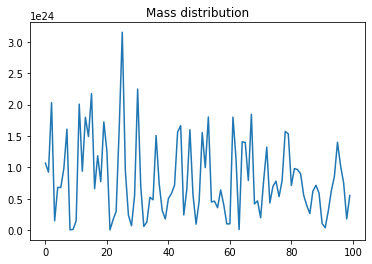

In [7]:
plt.title('Mass distribution')
plt.plot(masses.flatten())

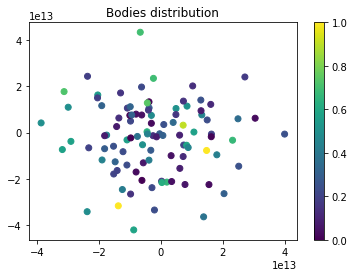

In [8]:
mass_scaler = MinMaxScaler()
cmap = mass_scaler.fit_transform(masses.reshape(-2, 2))
c = mcolors.ColorConverter().to_rgb

plt.title('Bodies distribution')
plt.scatter(positions[:, 0], positions[:, 1], c=cmap)
plt.colorbar()

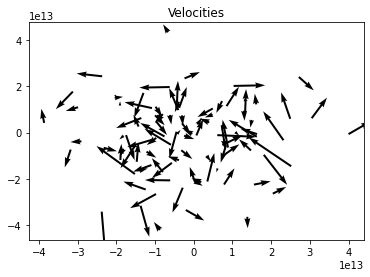

In [9]:
plt.title('Velocities')
plt.quiver(positions[:,0], positions[:,1], velocities[:,0], velocities[:,1])

Construct Python function from C shared library:

In [10]:
lib = cdll.LoadLibrary("barnes-hut/barneshut.so")
computeForces = lib.perform
computeForces.restype = ndpointer(dtype=c_double,
                          shape=(count,2))

Compute forces using C function:

In [14]:
state = np.concatenate((masses.T, positions), axis=1)
state

array([[ 1.06603821e+24, -3.05340281e+12,  7.37836883e+12],
       [ 9.23680196e+23, -3.76482115e+11, -5.48440924e+11],
       [ 2.03032186e+24,  7.21210471e+12,  3.16525467e+12],
       [ 1.48026871e+23, -6.17825952e+12,  7.55729432e+12],
       [ 6.78912102e+23,  2.04270226e+13, -2.64022166e+13],
       [ 6.78876596e+23, -9.79136843e+12,  4.92551059e+12],
       [ 9.83329857e+23, -1.75090407e+13, -1.12220668e+12],
       [ 1.60851419e+24,  8.46573639e+12,  1.13950038e+13],
       [ 3.94624852e+21, -3.81962872e+12,  1.32496035e+13],
       [ 1.07338679e+22, -1.00110583e+13,  7.41745335e+12],
       [ 1.49008753e+23, -5.65973246e+12, -1.30959529e+13],
       [ 2.00732515e+24, -4.45829158e+12,  3.19362973e+11],
       [ 9.37501375e+23, -1.24292607e+13, -2.46234413e+13],
       [ 1.79784746e+24,  1.06932837e+13,  1.97273530e+11],
       [ 1.49011464e+24,  1.93345617e+12, -2.14198065e+13],
       [ 2.17346481e+24, -2.38650819e+12,  2.33829749e+13],
       [ 6.59604557e+23, -3.79190299e+12

In [12]:
radius = max(abs(positions.flatten()))
radius

43294016808873.28

In [13]:
#forces = computeForces(c_void_p(state.ctypes.data),c_int(count),c_double(accuracy), c_double(radius))